# Group Project

### Libraries Import

In [1]:
# Standard scientific libraries
import numpy as np
import pandas as pd
import scipy as sp

# Visualization 
 
# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

# Seaborn
import seaborn as sns
sns.set(color_codes=True)

### Data Import and Extraction

In [2]:
# Import the dataset
raw = pd.read_csv("../datasets/FinalDF.csv", sep=',', \
                  dtype = None, error_bad_lines=False, \
                  encoding='utf-8', keep_default_na=False)                  
                  
df = pd.DataFrame(raw)

# Drop rows with missing values and drop duplicate (optional)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [3]:
df.head()

,Country,Occupation,Female (Sex),Male (Sex),ratio,FathersTotPaid,MothersTotPaid,Delta
0,Austria,1. Managers (ISCO-08),5556.0,9571.0,0.580504,6.9,51.2,44.3
1,Austria,2. Professionals (ISCO-08),3925.0,5817.0,0.674746,6.9,51.2,44.3
2,Austria,3. Technicians and associate professionals (IS...,3028.0,4831.0,0.626785,6.9,51.2,44.3
3,Austria,4. Clerical support workers (ISCO-08),2610.0,3692.0,0.706934,6.9,51.2,44.3
4,Austria,5. Service and sales workers (ISCO-08),1674.0,2365.0,0.707822,6.9,51.2,44.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 8 columns):
Country           236 non-null object
Occupation        236 non-null object
Female (Sex)      236 non-null float64
Male (Sex)        236 non-null float64
ratio             236 non-null float64
FathersTotPaid    236 non-null float64
MothersTotPaid    236 non-null float64
Delta             236 non-null float64
dtypes: float64(6), object(2)
memory usage: 16.6+ KB


In [5]:
# standardize the columns to lowercase as well
df.columns = [c.lower().replace(' ', '_') for c in df.columns]
# rename columns name
df = df.rename(columns={"female_(sex)": "female", "male_(sex)": "male"})

In [6]:
df.head()

,country,occupation,female,male,ratio,fatherstotpaid,motherstotpaid,delta
0,Austria,1. Managers (ISCO-08),5556.0,9571.0,0.580504,6.9,51.2,44.3
1,Austria,2. Professionals (ISCO-08),3925.0,5817.0,0.674746,6.9,51.2,44.3
2,Austria,3. Technicians and associate professionals (IS...,3028.0,4831.0,0.626785,6.9,51.2,44.3
3,Austria,4. Clerical support workers (ISCO-08),2610.0,3692.0,0.706934,6.9,51.2,44.3
4,Austria,5. Service and sales workers (ISCO-08),1674.0,2365.0,0.707822,6.9,51.2,44.3


In [7]:
# filter columns for statistical summary
filtered = df[['female','male','fatherstotpaid','motherstotpaid']]
                
round(filtered.describe(include="all"),2)

,female,male,fatherstotpaid,motherstotpaid
count,236.00,236.00,236.00,236.00
mean,2630.25,3255.51,3.29,34.68
std,1353.27,1750.62,3.69,20.54
min,702.00,758.00,0.00,8.90
25%,1627.25,2008.25,0.40,16.00
50%,2424.00,2872.50,2.00,26.80
75%,3258.00,3992.00,5.70,51.20
max,8007.00,10351.00,12.50,85.00


In [9]:
# split dataset
train = df.iloc[:146]
test = df.iloc[146:]
# determine the target column we want to predict
target = train[['female','male','ratio','fatherstotpaid','motherstotpaid','delta']]

Visual relationship between **female-motherstotpaid** and **male-fatherstotpaid**

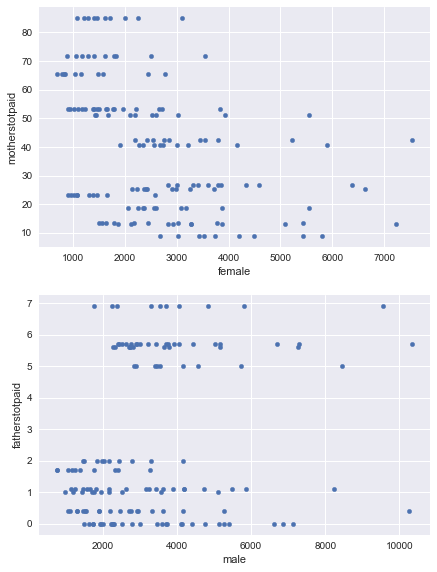

In [10]:
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)

train.plot(x="female", y="motherstotpaid", ax=ax1, kind="scatter")
train.plot(x="male", y="fatherstotpaid", ax=ax2, kind="scatter")

plt.show()

Visual relationship between **ratio-motherstotpaid** and **ratio-fatherstotpaid**

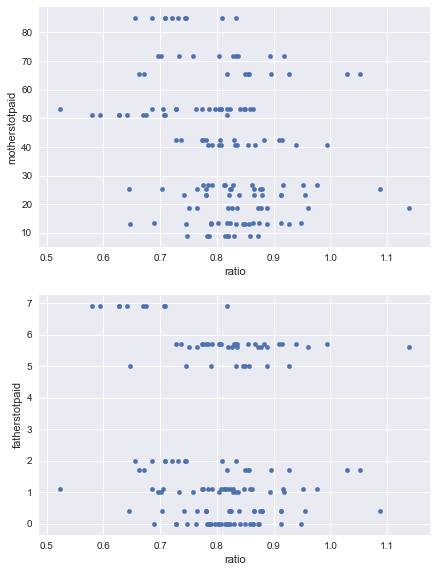

In [11]:
fig = plt.figure(figsize=(7,15))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)

train.plot(x="ratio", y="motherstotpaid", ax=ax1, kind="scatter")
train.plot(x="ratio", y="fatherstotpaid", ax=ax2, kind="scatter")

plt.show()

Visual relationship between **delta-motherstotpaid** and **delta-fatherstotpaid**

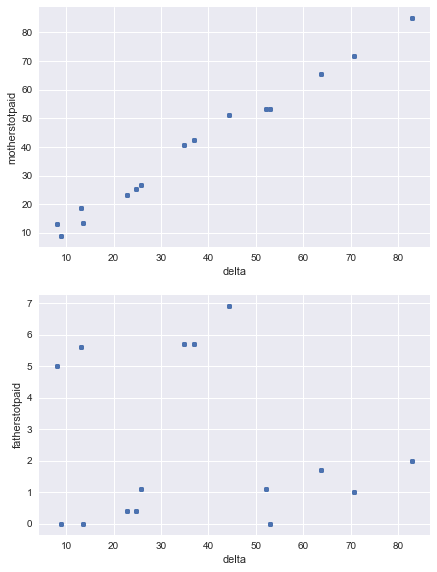

In [12]:
fig = plt.figure(figsize=(7,15))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)

train.plot(x="delta", y="motherstotpaid", ax=ax1, kind="scatter")
train.plot(x="delta", y="fatherstotpaid", ax=ax2, kind="scatter")

plt.show()

Correlation of the columns.

In [13]:
train[['female','male','ratio','fatherstotpaid','motherstotpaid','delta']].corr()

,female,male,ratio,fatherstotpaid,motherstotpaid,delta
female,1.000000,0.972205,-0.062764,0.219161,-0.428183,-0.449855
male,0.972205,1.000000,-0.259532,0.240276,-0.337439,-0.361847
ratio,-0.062764,-0.259532,1.000000,-0.118871,-0.271604,-0.257376
fatherstotpaid,0.219161,0.240276,-0.118871,1.000000,0.009131,-0.099393
motherstotpaid,-0.428183,-0.337439,-0.271604,0.009131,1.000000,0.994099
delta,-0.449855,-0.361847,-0.257376,-0.099393,0.994099,1.000000
